In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
df = pd.read_csv("final_data.csv")
df.head()

,gender,age(year),race_and_hispanic_origin,country_of_birth,usa_citizenship,highest_education_grade_received,marital_status,no_of_people_in_the_household,family_size,total_family_income,veteran_status,e_cigarette_use
0,2.0,48.0,3.0,1.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,Did not smoke
1,1.0,16.0,4.0,1.0,1.0,4.0,1.0,4.0,4.0,7.0,2.0,Did not smoke
2,1.0,64.0,4.0,1.0,1.0,4.0,1.0,3.0,3.0,7.0,2.0,Did not smoke
3,1.0,61.0,1.0,1.0,1.0,3.0,1.0,4.0,4.0,4.0,1.0,Did not smoke
4,1.0,31.0,4.0,1.0,1.0,4.0,5.0,4.0,1.0,7.0,1.0,Smoked


In [44]:
X = df.drop("e_cigarette_use", axis=1) 
y = df["e_cigarette_use"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
logreg_model = LogisticRegression(max_iter=500)

In [46]:
feature_selector = SelectFromModel(logreg_model)
feature_selector.fit_transform(X, y)

array([[2., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [2., 2., 1.],
       [1., 2., 1.],
       [1., 1., 1.]])

In [47]:
# # Use SelectFromModel for feature selection
# feature_selector = SelectFromModel(logreg_model)
# X_train_selected = feature_selector.fit_transform(X_train, y_train)
# X_test_selected = feature_selector.transform(X_test)

In [48]:
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['gender', 'country_of_birth', 'usa_citizenship']


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your pandas DataFrame with features and target
# X should be your feature columns, and y should be your target variable

df = pd.read_csv("final_data.csv")

X = df.drop("e_cigarette_use", axis=1)  # Adjust "target_column" to your target variable
y = df["e_cigarette_use"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression(max_iter=500)

# Use SelectFromModel for feature selection
feature_selector = SelectFromModel(logreg_model)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

# Train the model on the selected features
logreg_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# Print the selected features
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features:", list(selected_features))

Accuracy: 0.98
Selected Features: ['gender', 'country_of_birth', 'usa_citizenship', 'veteran_status']


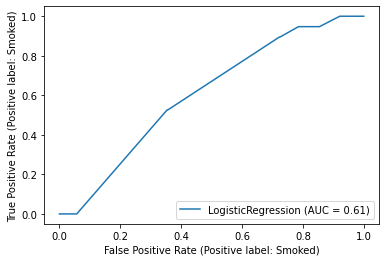

In [51]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg_model, X_test_selected, y_test)